In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
# @title Plotting Functions

def visualize_components(component1, component2, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

In [4]:
from sklearn.datasets import fetch_openml

# Get images
mnist = fetch_openml(name='mnist_784', as_frame=False)
X_all = mnist.data

# Get labels
labels_all = np.array([int(k) for k in mnist.target])

In [5]:
from sklearn.decomposition import PCA

# Initializes PCA
pca_model = PCA(n_components=2)

# Performs PCA
pca_model.fit(X_all)

PCA(n_components=2)

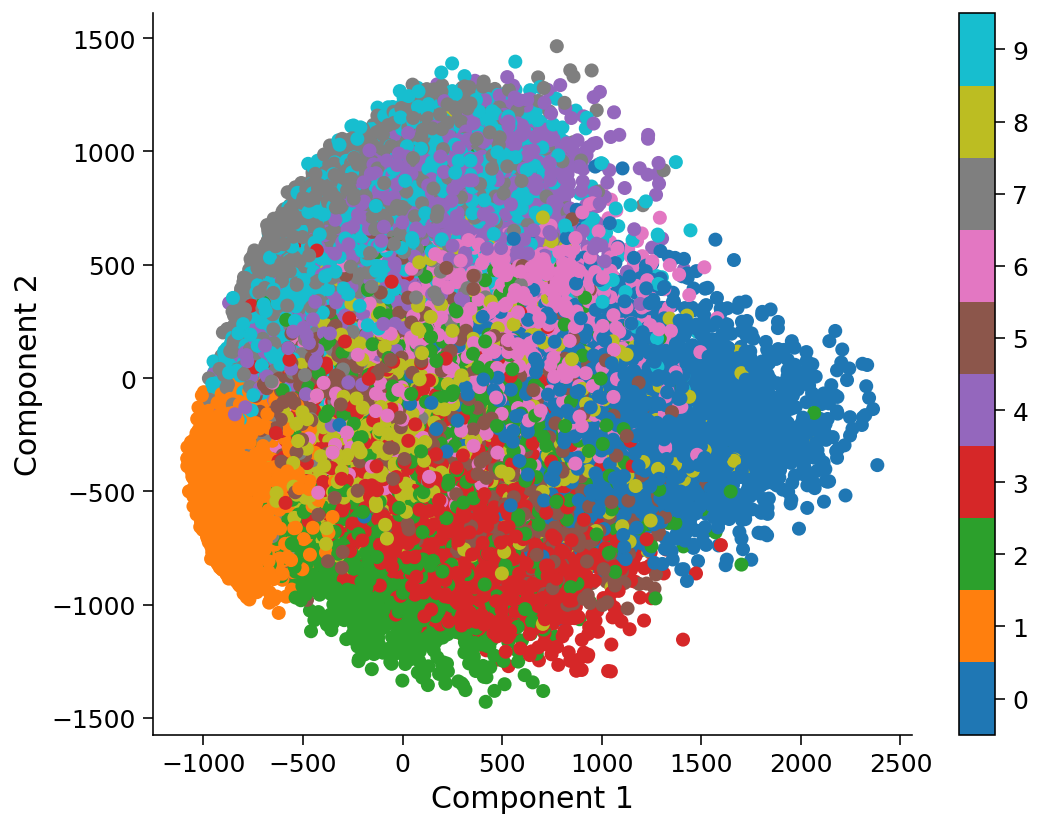

In [6]:
#################################################
## TODO for students: take only 2,000 samples and perform PCA
# Comment once you've completed the code
#raise NotImplementedError("Student exercise: perform PCA")
#################################################

# Take only the first 2000 samples with the corresponding labels
X, labels = X_all[2000:], labels_all[2000:]

# Perform PCA
scores = pca_model.transform(X)

# Plot the data and reconstruction
visualize_components(scores.T[0], scores.T[1], labels)

In [7]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=2020)

In [ ]:
#################################################
## TODO for students
# Comment once you've completed the code
#raise NotImplementedError("Student exercise: perform t-SNE")
#################################################
print("print\n")

# Perform t-SNE
embed = tsne_model.fit_transform(X)
print("print\n")
# Visualize the data
visualize_components(embed[:, 0], embed[:, 1], labels)
print("print\n")

print



C:\Users\19562\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\19562\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
def explore_perplexity(values, X, labels):
  """
  Plots a 2D representation of the data for visualization with categories
  labeled as different colors using different perplexities.

  Args:
    values (list of floats) : list with perplexities to be visualized
    X (np.ndarray of floats) : matrix with the dataset
    Returns:
    Nothing.

  """
  for perp in values:

    #################################################
    ## TO DO for students: Insert your code here to redefine the t-SNE "model"
    ## while setting the perplexity perform t-SNE on the data and plot the
    ## results for perplexity = 50, 5, and 2 (set random_state to 2020
    # Comment these lines when you complete the function
    #raise NotImplementedError("Student Exercise! Explore t-SNE with different perplexity")
    #################################################

    # Perform t-SNE
    tsne_model = TSNE(n_components=2, perplexity=perp, random_state=2020)

    embed = tsne_model.fit_transform(X)
    visualize_components(embed[:, 0], embed[:, 1], labels, show=False)
    plt.title(f"perplexity: {perp}")


# Visualize
values = [50, 5, 2]
explore_perplexity(values, X, labels)